# 2.Load the dataset into the tool.

In [1]:
import os
os.chdir("C:/Users/kisho/Downloads")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
abalone=pd.read_csv('abalone.csv')

In [39]:
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 3.Visualizations

# a)Univariate Analysis

In [40]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

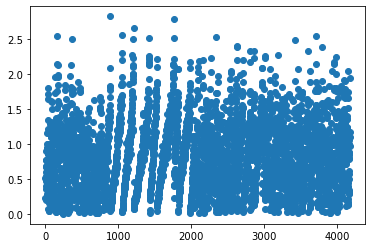

In [41]:
plt.scatter(abalone.index,abalone['Whole weight'])
plt.show()

# b)Bi-Variate Analysis

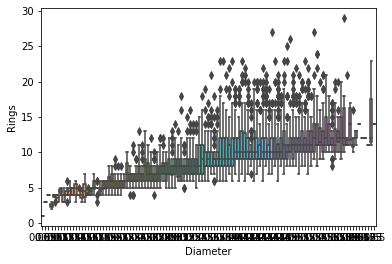

In [50]:
sns.boxplot(x='Diameter' ,y='Rings', data = abalone)
plt.show()

# c)Multi-Variate Analysis

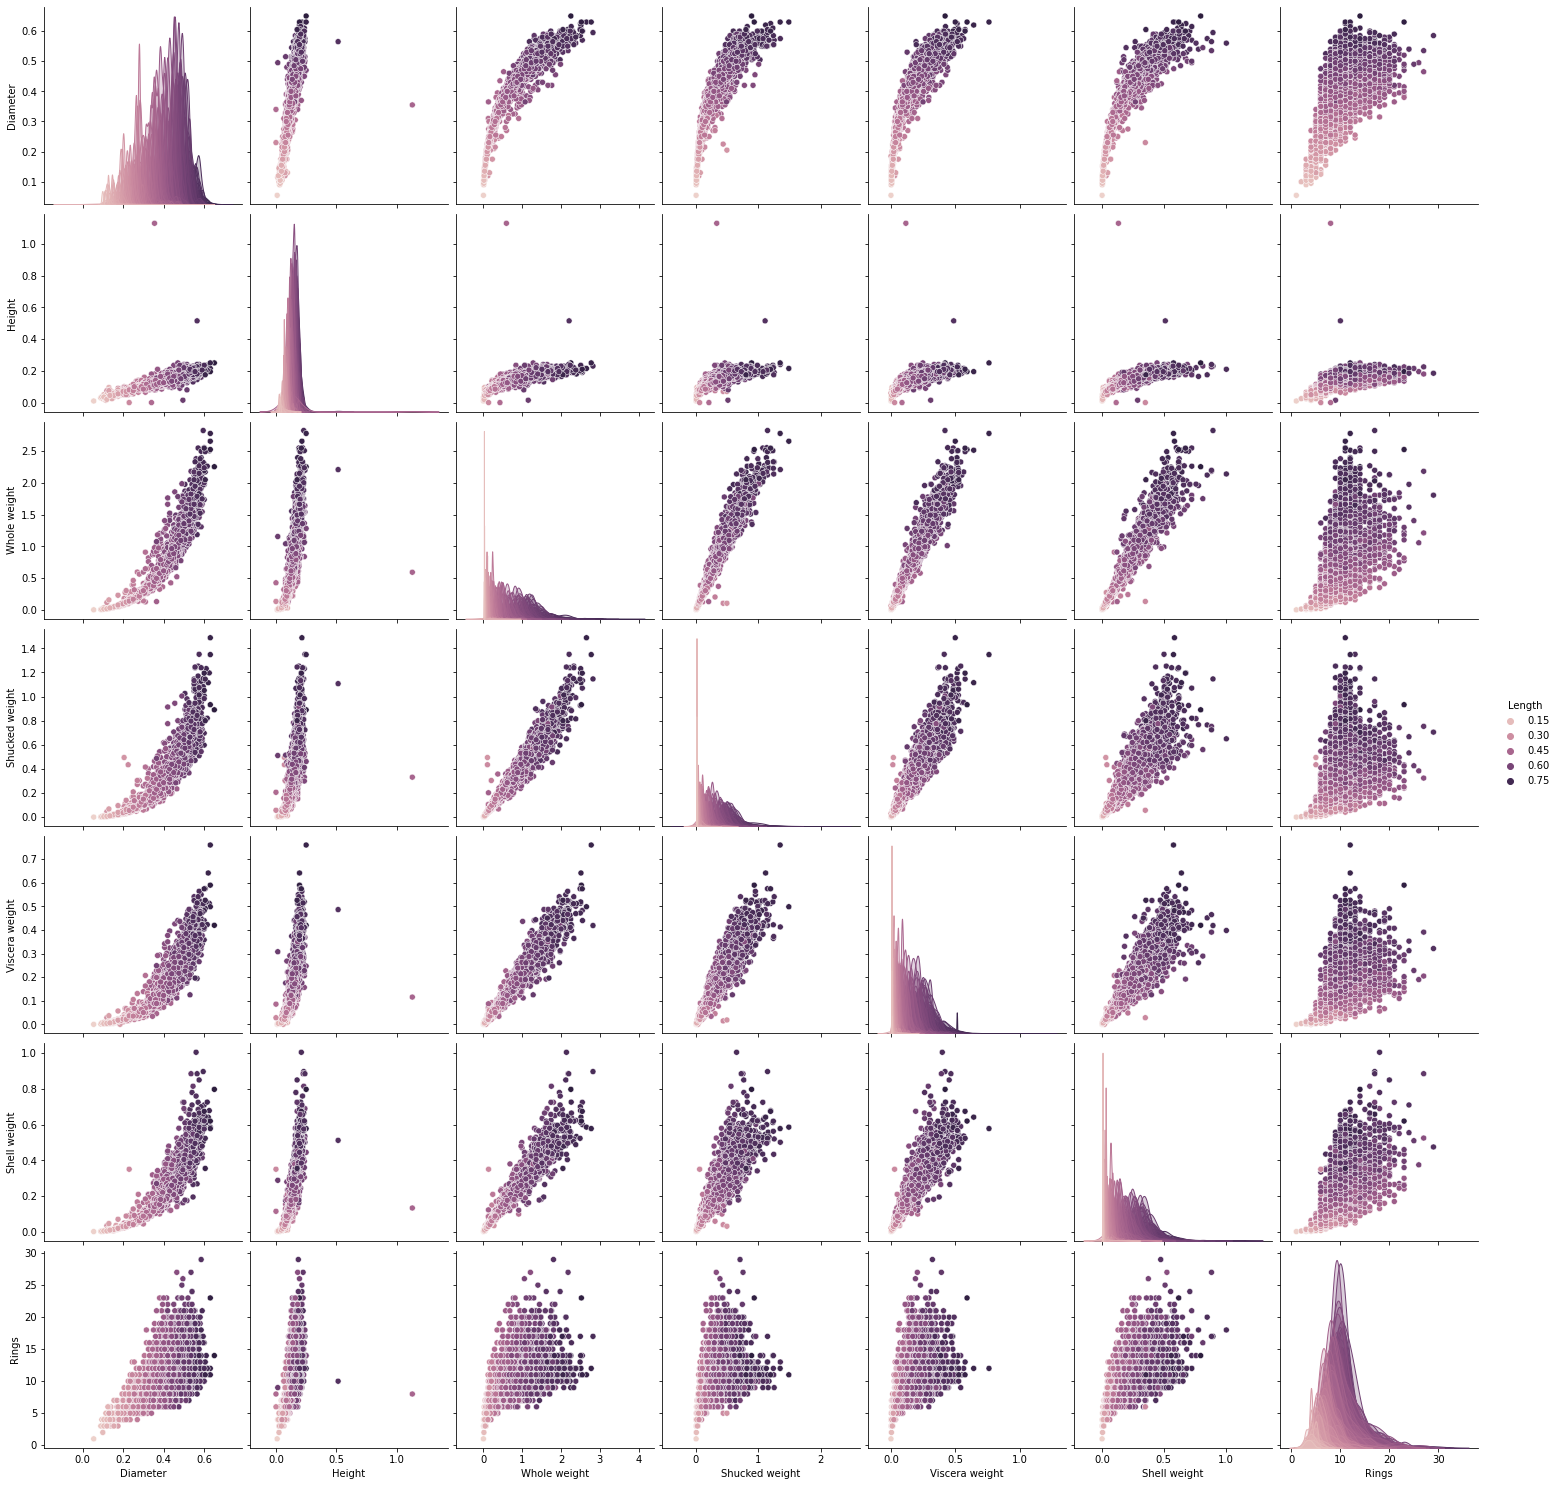

In [15]:
sns.pairplot(abalone, hue="Length", height = 3)
plt.show()

# 4.Perform descriptive statistics on the dataset.

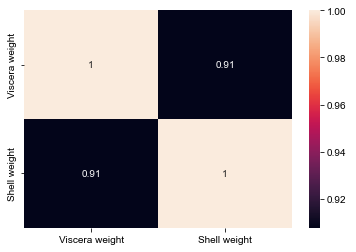

In [16]:
dff = abalone[['Viscera weight','Shell weight']]
sns.heatmap(dff.corr(), annot = True)
sns.set(rc = {'figure.figsize':(40,40)})

# 5.Check for Missing values and deal with them.

In [17]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [19]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [26]:
abalone['Height'].isnull().sum()

0

In [27]:
abalone['Height'].mean()

0.1395163993296614

In [28]:
abalone['Height'].replace(np.NaN, abalone['Height'].mean()).head(15)

0     0.095
1     0.090
2     0.135
3     0.125
4     0.080
5     0.095
6     0.150
7     0.125
8     0.125
9     0.150
10    0.140
11    0.110
12    0.135
13    0.145
14    0.100
Name: Height, dtype: float64

In [29]:
abalone['Height'].median()

0.14

In [30]:
abalone['Height'].mode()

0    0.15
Name: Height, dtype: float64

# 7.Check for Categorical columns and perform encoding.

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
encorder = OneHotEncoder(sparse=False)
cat_cols = ['Rings']

In [47]:
from sklearn.preprocessing import StandardScaler
abalone_ready = abalone.copy()

In [48]:
scaler  = StandardScaler()
num_cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight''Shell weight']

In [49]:
abalone_ready.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [64]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
encoder = OneHotEncoder(sparse=False)
cat_cols = ['Sex']

In [69]:
abalone_ready = pd.concat([abalone_encoded, abalone_ready], axis = 1)

In [70]:
abalone_ready['Height'] = abalone_ready['Height'].apply(lambda x: 1 if x == 'yes' else 0)

In [71]:
print('Shape of dataframe:', abalone_ready.shape)

Shape of dataframe: (4177, 12)


In [72]:
abalone_ready

,0,1,2,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.0,1.0,M,0.455,0.365,0,0.5140,0.2245,0.1010,0.1500,15
1,0.0,0.0,1.0,M,0.350,0.265,0,0.2255,0.0995,0.0485,0.0700,7
2,1.0,0.0,0.0,F,0.530,0.420,0,0.6770,0.2565,0.1415,0.2100,9
3,0.0,0.0,1.0,M,0.440,0.365,0,0.5160,0.2155,0.1140,0.1550,10
4,0.0,1.0,0.0,I,0.330,0.255,0,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,1.0,0.0,0.0,F,0.565,0.450,0,0.8870,0.3700,0.2390,0.2490,11
4173,0.0,0.0,1.0,M,0.590,0.440,0,0.9660,0.4390,0.2145,0.2605,10
4174,0.0,0.0,1.0,M,0.600,0.475,0,1.1760,0.5255,0.2875,0.3080,9
4175,1.0,0.0,0.0,F,0.625,0.485,0,1.0945,0.5310,0.2610,0.2960,10


# 6.Find the outliers and replace them outliers

In [73]:
abalone = pd.get_dummies(abalone)
dummy_abalone = abalone

In [74]:
from collections import Counter
def detection(abalone,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(abalone[c],26)
        
        Q3 = np.percentile(abalone[c],76)
        
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        lower_range = Q1 - (outlier_step)
        upper_range = Q3 + (outlier_step)
        
        outlier_indices.extend(outlier_indices)
        
    outlier_indices = Counter(outlier_indicates)
    
    multiple_outliers = list(i for i, v in outlier_indices.times() if v > 2)
    
    return multiple_outliers

In [75]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex_F           4177 non-null   uint8  
 9   Sex_I           4177 non-null   uint8  
 10  Sex_M           4177 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 273.4 KB


# 8. Split the data into dependent and independent variables. 9. Scale the independent variables

# x - independent variable  y - dependent variable

In [78]:
x = abalone.iloc[:,:3]

In [79]:
x

,Length,Diameter,Height
0,0.455,0.365,0.095
1,0.350,0.265,0.090
2,0.530,0.420,0.135
3,0.440,0.365,0.125
4,0.330,0.255,0.080
...,...,...,...
4172,0.565,0.450,0.165
4173,0.590,0.440,0.135
4174,0.600,0.475,0.205
4175,0.625,0.485,0.150


In [80]:
abalone
y = abalone.iloc[:,1:]

In [81]:
y

,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


# 10. Split the data into training and testing

# 12.Train the Model

# 13. Test the Model


In [82]:
feature = abalone_ready.drop('Height', axis = 1)

In [83]:
target = abalone_ready['Height']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle = True, test_size = 0.2, random_state = 1)

In [85]:
print('Shape of training features:', X_train.shape)
print('Shape of training features:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training features: (3341, 11)
Shape of training features: (836, 11)
Shape of training label: (3341,)
Shape of training label: (836,)


In [86]:
X_train

,0,1,2,Sex,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
666,0.0,0.0,1.0,M,0.455,0.350,0.4835,0.1815,0.1440,0.1600,11
2813,0.0,1.0,0.0,I,0.255,0.195,0.0725,0.0285,0.0170,0.0210,4
1862,0.0,1.0,0.0,I,0.520,0.410,0.5185,0.2165,0.0915,0.1840,8
3684,0.0,1.0,0.0,I,0.620,0.470,0.9660,0.4470,0.1710,0.2840,11
551,0.0,1.0,0.0,I,0.615,0.490,0.9885,0.4145,0.1950,0.3450,13
...,...,...,...,...,...,...,...,...,...,...,...
2895,0.0,1.0,0.0,I,0.540,0.415,0.6190,0.2755,0.1500,0.1765,10
2763,0.0,1.0,0.0,I,0.550,0.425,0.6560,0.2570,0.1700,0.2030,10
905,0.0,1.0,0.0,I,0.320,0.240,0.1575,0.0700,0.0265,0.0425,5
3980,1.0,0.0,0.0,F,0.525,0.410,0.7745,0.4160,0.1630,0.1800,7


In [87]:
y_train

666     0
2813    0
1862    0
3684    0
551     0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Height, Length: 3341, dtype: int64

In [88]:
X_train.shape

(3341, 11)

In [89]:
y_train.shape

(3341,)

In [91]:
X_train = X_train.values.reshape((-1,1))

In [92]:
X_train

array([[0.0],
       [0.0],
       [1.0],
       ...,
       [0.032],
       [0.04],
       [9]], dtype=object)

In [93]:
y_train

666     0
2813    0
1862    0
3684    0
551     0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Height, Length: 3341, dtype: int64

In [94]:
X_test

,0,1,2,Sex,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
17,1.0,0.0,0.0,F,0.440,0.340,0.4510,0.1880,0.0870,0.1300,10
1131,0.0,0.0,1.0,M,0.565,0.435,0.9900,0.5795,0.1825,0.2060,8
299,0.0,0.0,1.0,M,0.370,0.280,0.2340,0.0905,0.0585,0.0750,9
1338,0.0,0.0,1.0,M,0.580,0.455,0.7955,0.4050,0.1670,0.2040,10
2383,1.0,0.0,0.0,F,0.525,0.390,0.6005,0.2265,0.1310,0.2100,16
...,...,...,...,...,...,...,...,...,...,...,...
1787,0.0,1.0,0.0,I,0.545,0.420,0.8935,0.4235,0.2195,0.2280,8
3075,1.0,0.0,0.0,F,0.680,0.520,1.4940,0.6150,0.3935,0.4060,11
2766,1.0,0.0,0.0,F,0.555,0.445,1.1465,0.5510,0.2440,0.2785,8
1410,1.0,0.0,0.0,F,0.665,0.530,1.4910,0.6345,0.3420,0.4350,10


In [95]:
y_test

17      0
1131    0
299     0
1338    0
2383    0
       ..
1787    0
3075    0
2766    0
1410    0
2529    0
Name: Height, Length: 836, dtype: int64

# 11.Build the Model

In [99]:
transformed_Sex_feature = OneHotEncoder().fit_transform(abalone['Sex']).values.reshape((-1,1))
abalone_Sex_encoded = pd.DataFrame(transformed_Sex_features, colums = ["Sex_"+str(int(i)) for i in range(transformed_Sex_feature.shape[1])])
abalone = pd.concat([abalone, abalone_Sex_encoded] , axis = 1)

KeyError: 'Sex'

In [100]:
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


# 14. Measure the performance using Metrics.

In [101]:
abalone['Height'] = abalone['Rings'] + 1.5
abalone['Height'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Height, dtype: float64